# The Cost of an Undergraduate Education (2019 / 2021)
### A look at costs per state, per type, and per length

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import os

warnings.filterwarnings("ignore")

**Import csv file and display initial dataframe**

In [2]:
school_df = pd.read_csv("data_sources/nces330_20.csv")
school_df = school_df.dropna()
school_df = school_df.rename(columns={"Value": "Cost"})
school_df.head()

,Year,State,Type,Length,Expense,Cost
0,2013,Alabama,Private,4-year,Fees/Tuition,13983
1,2013,Alabama,Private,4-year,Room/Board,8503
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073
4,2013,Alabama,Public In-State,4-year,Room/Board,8473


In [3]:
school_df["State"].value_counts()

State
Alabama                 71
Montana                 71
New Hampshire           71
New Jersey              71
New Mexico              71
New York                71
North Carolina          71
North Dakota            71
Ohio                    71
Oklahoma                71
Oregon                  71
Pennsylvania            71
Rhode Island            71
South Carolina          71
South Dakota            71
Tennessee               71
Texas                   71
Utah                    71
Vermont                 71
Virginia                71
Washington              71
West Virginia           71
Wisconsin               71
Nebraska                71
Missouri                71
Illinois                71
California              71
Connecticut             71
Arkansas                71
Arizona                 71
Florida                 71
Georgia                 71
Hawaii                  71
Idaho                   71
Mississippi             71
Indiana                 71
Iowa                  

In [4]:
state_codes = {"Alabama": "AL", "Montana": "MT", "New Hampshire": "NH", "New Jersey": "NJ",
               "New Mexico": "NM", "New York": "NY", "North Carolina": "NC", "North Dakota": "ND",
               "Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", 
               "Rhode Island": "RI", "South Carolina": "SC", "South Dakota": "SD", "Tennessee": "TN",
               "Texas": "TX", "Utah": "UT", "Vermont": "VT", "Virginia": "VA", 
               "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Nebraska": "NE",
               "Missouri": "MO", "Illinois": "IL", "California": "CA", "Connecticut": "CT",
               "Arkansas": "AR", "Arizona": "AZ", "Florida": "FL", "Georgia": "GA",
               "Hawaii": "HI", "Idaho": "ID", "Mississippi": "MS", "Indiana": "IN",
               "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
               "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI",
               "Minnesota": "MN", "Colorado": "CO", "Nevada": "NV", "Alaska": "AK",
               "Delaware": "DE", "Wyoming": "WY", "District of Columbia": "DC"}

school_df["State Code"] = school_df["State"].map(state_codes)

**Create seperate dataframes for fees/tuition and room/board. Create frames for 3 year period**

In [5]:
fees_tuition_data = school_df[school_df["Expense"].str.lower().str.contains("fees/tuition")]
fees_tuition_data["Expense"] = fees_tuition_data["Expense"].str.replace("Room/Board", "")
fees_tuition_data.reset_index(drop = True, inplace = True)

room_board_data = school_df[school_df["Expense"].str.lower().str.contains("room/board")]
room_board_data["Expense"] = room_board_data["Expense"].str.replace("Fees/Tuition", "")
room_board_data.reset_index(drop = True, inplace = True)

fees_tuition_data_2019 = fees_tuition_data[fees_tuition_data["Year"] == 2019]

**Further separate frames into private and public institutions, three years**

In [6]:
school_private_2021 = fees_tuition_data[fees_tuition_data["Type"] == "Private"].groupby(["State"]).max()
school_private_2021 = school_private_2021.sort_values(by="Cost")
school_private_2021 = school_private_2021[school_private_2021["Year"] == 2021]
del school_private_2021["Year"]

school_public_2021 = fees_tuition_data[fees_tuition_data["Type"] != "Private"].groupby(["State"]).max()
school_public_2021 = school_public_2021.sort_values(by="Cost")
school_public_2021 = school_public_2021[school_public_2021["Year"] == 2021]
del school_public_2021["Year"]

In [7]:
school_private_2019 = fees_tuition_data_2019[fees_tuition_data_2019["Type"] == "Private"].groupby(["State"]).max()
school_private_2019 = school_private_2019.sort_values(by="Cost")

school_public_2019 = fees_tuition_data_2019[fees_tuition_data_2019["Type"] != "Private"].groupby(["State"]).max()
school_public_2019 = school_public_2019.sort_values(by="Cost")

**Finally, grab the differences between two and four year costs, 2021 and 2019**

In [8]:
school_twoyear = fees_tuition_data[fees_tuition_data["Length"] == "2-year"].groupby(["State"]).max()
school_twoyear = school_twoyear.sort_values(by="Cost")
school_twoyear = school_twoyear[school_twoyear["Year"] == 2021]
del school_twoyear["Year"]

school_twoyear_2019 = fees_tuition_data_2019[fees_tuition_data_2019["Length"] == "2-year"].groupby(["State"]).max()
school_twoyear_2019 = school_twoyear_2019.sort_values(by="Cost")
del school_twoyear_2019["Year"]

school_fouryear_public_2021 = school_public_2021[school_public_2021["Length"] == "4-year"]
school_fouryear_public_2021.head()

school_fouryear_public_2019 = school_public_2019[school_public_2019["Length"] == "4-year"]
del school_fouryear_public_2019["Year"]

## Plot out costs gathered from created DataFrames and compare them to eachother

_
### Plot 2019 and 2021 cost of 4 year public and private education
_

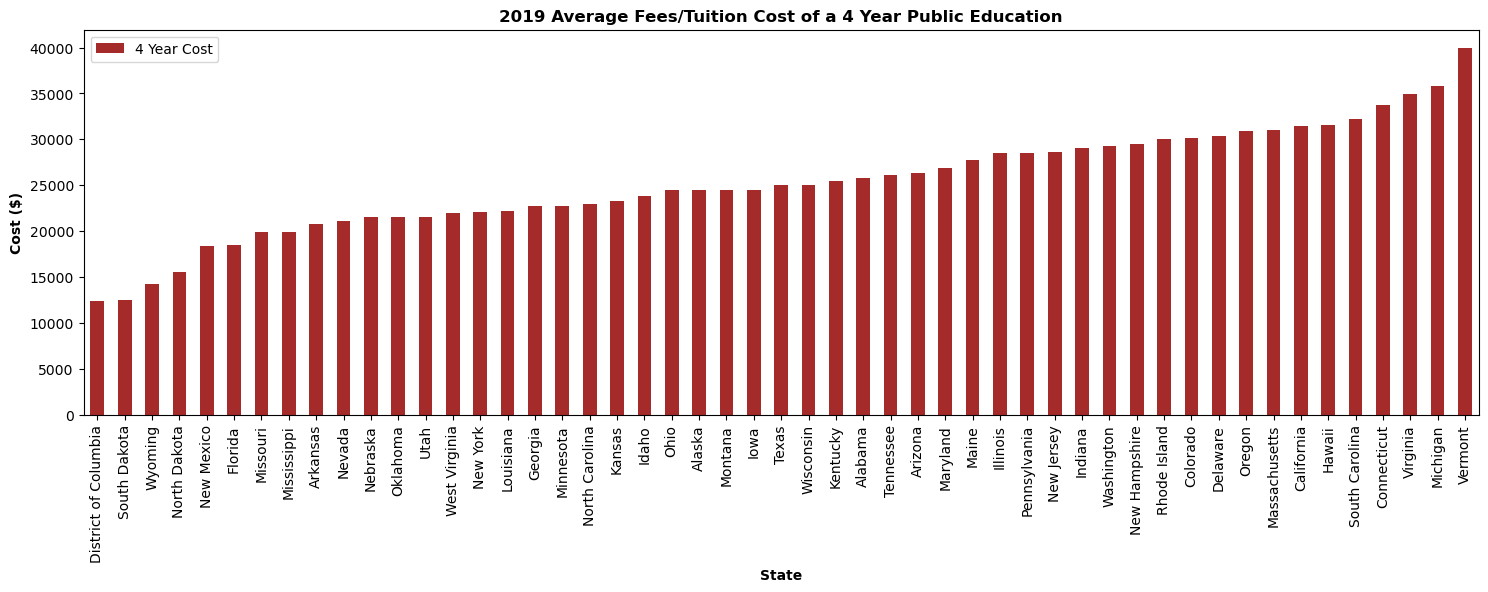

In [9]:
school_fouryear_public_2019.plot.bar(figsize = (18,5), color="brown")
plt.legend(labels=["4 Year Cost"])
plt.title("2019 Average Fees/Tuition Cost of a 4 Year Public Education", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.savefig(os.path.join("output", "public_2019.png"))
plt.show()

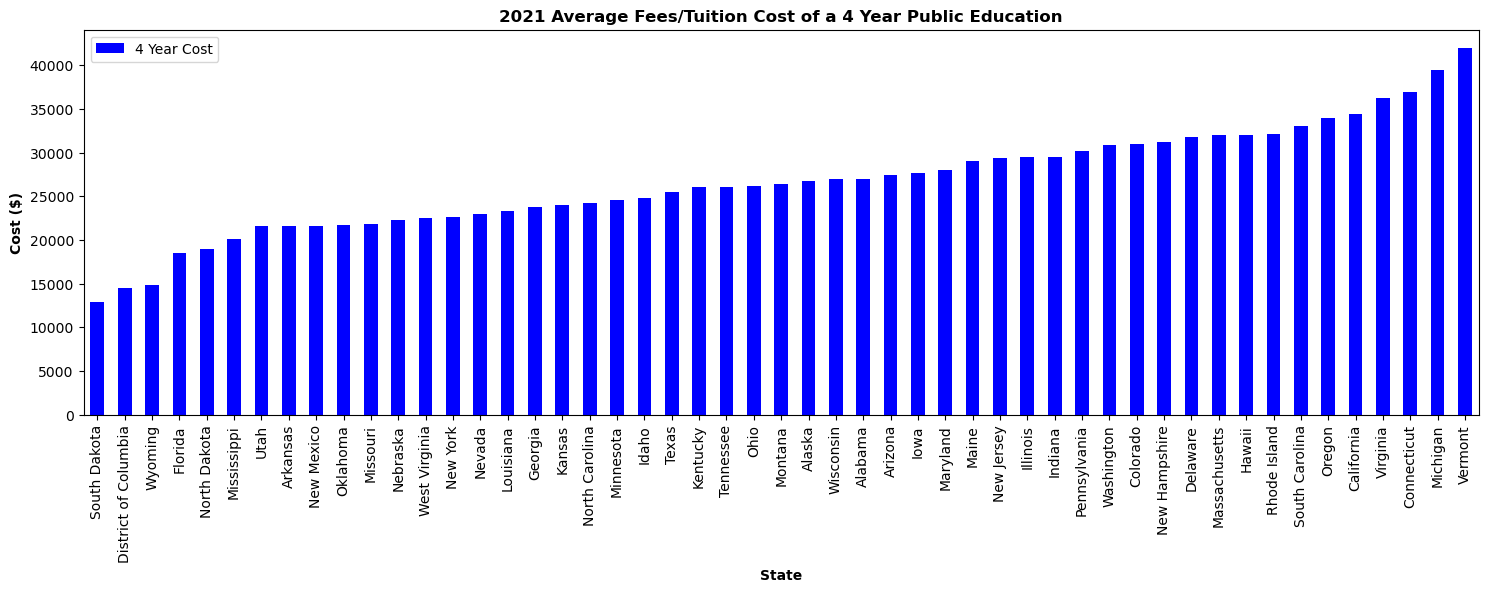

In [10]:
school_fouryear_public_2021.plot.bar(figsize = (18,5), color="blue")
plt.legend(labels=["4 Year Cost"])
plt.title("2021 Average Fees/Tuition Cost of a 4 Year Public Education", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.savefig(os.path.join("output", "public_2021.png"))
plt.show()

In [11]:
combined_for_plot_2021 = pd.merge(school_fouryear_public_2019, school_fouryear_public_2021, on=["State", "State Code", "Length", "Expense", "Type"])
combined_for_plot_2021 = combined_for_plot_2021.rename(columns={"Cost_x": "Cost 2019", 
                                                                "Cost_y": "Cost 2021",
                                                                })
combined_for_plot_2021.head()

,Type,Length,Expense,Cost 2019,State Code,Cost 2021
State,,,,,,
District of Columbia,Public Out-of-State,4-year,Fees/Tuition,12416,DC,14540
South Dakota,Public Out-of-State,4-year,Fees/Tuition,12465,SD,12924
Wyoming,Public Out-of-State,4-year,Fees/Tuition,14268,WY,14803
North Dakota,Public Out-of-State,4-year,Fees/Tuition,15565,ND,19021
New Mexico,Public Out-of-State,4-year,Fees/Tuition,18350,NM,21645


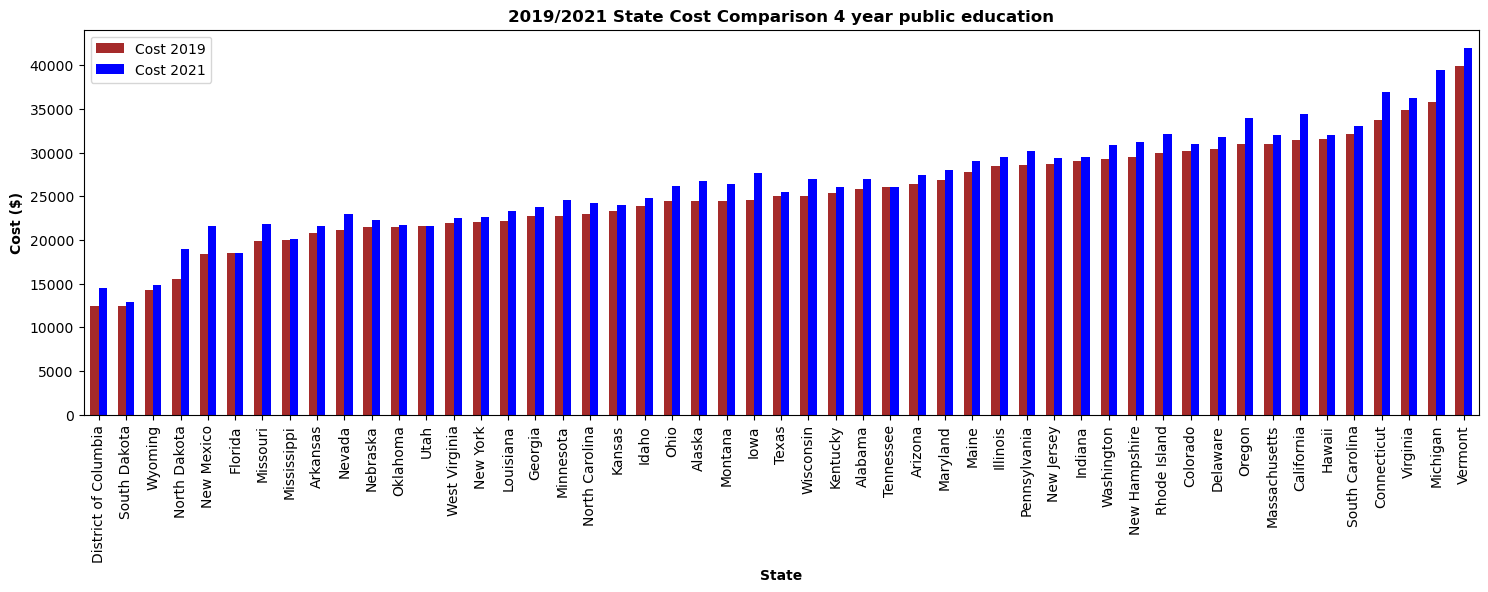

In [12]:
combined_for_plot_2021.plot.bar(figsize = (18, 5), color=["brown", "blue"], width = 0.6)
plt.title("2019/2021 State Cost Comparison 4 year public education", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.savefig(os.path.join("output", "four_comparison_2019_2021.png"))
plt.show()

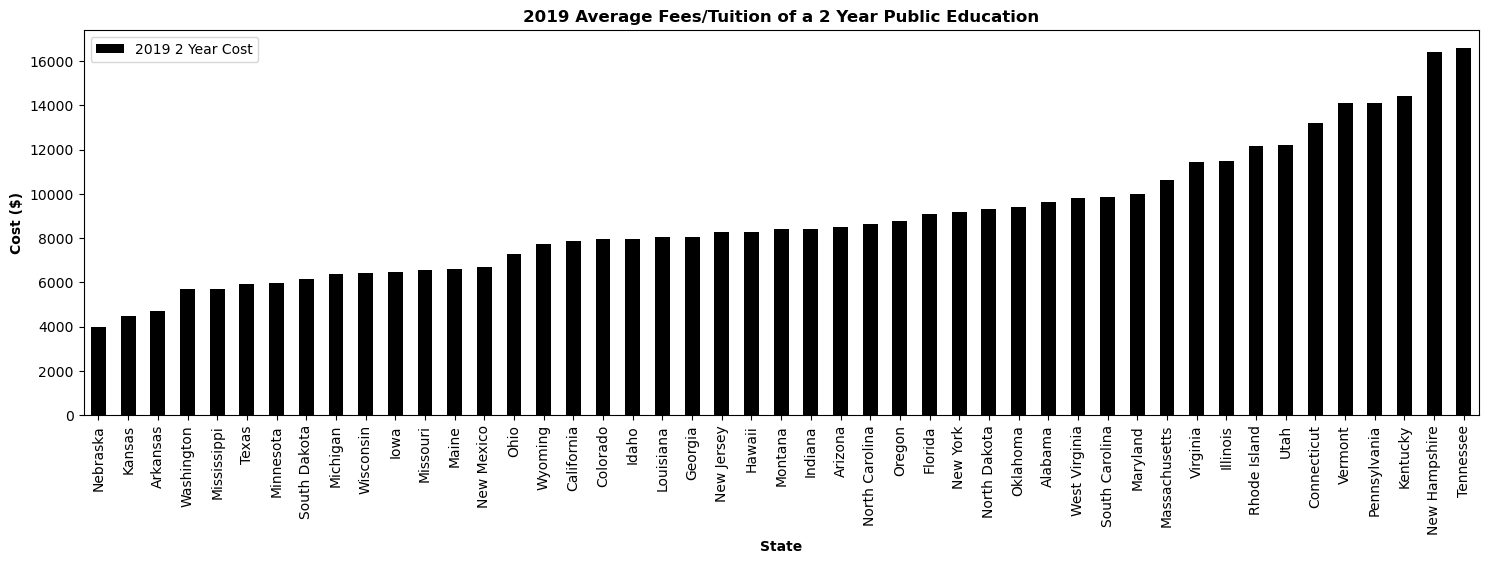

In [13]:
school_twoyear_2019.plot.bar(figsize = (18,5), color="black")
plt.legend(labels=["2019 2 Year Cost"])
plt.title("2019 Average Fees/Tuition of a 2 Year Public Education", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.savefig(os.path.join("output", "two_year_public_2019.png"))
plt.show()

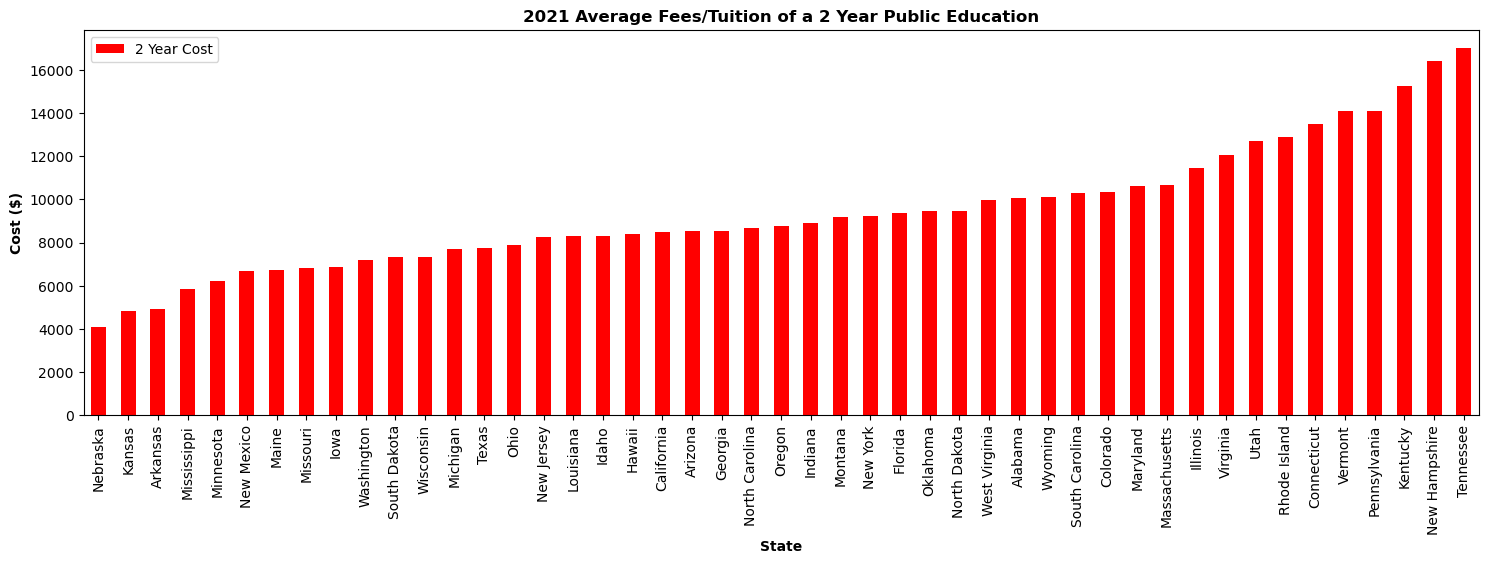

In [14]:
school_twoyear.plot.bar(figsize = (18,5), color="red")
plt.legend(labels=["2 Year Cost"])
plt.title("2021 Average Fees/Tuition of a 2 Year Public Education", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.savefig(os.path.join("output", "two_year_public_2021.png"))
plt.show()

**Combine 2year dataframes to make comparison chart**

In [15]:
combined_for_plot_2year = pd.merge(school_twoyear_2019, school_twoyear, on=["State", "State Code", "Length", "Expense", "Type"])
combined_for_plot_2year = combined_for_plot_2year.rename(columns={"Cost_x": "Cost 2019", 
                                                                "Cost_y": "Cost 2021",
                                                                })
combined_for_plot_2year.head()

,Type,Length,Expense,Cost 2019,State Code,Cost 2021
State,,,,,,
Nebraska,Public Out-of-State,2-year,Fees/Tuition,3985,NE,4101
Kansas,Public Out-of-State,2-year,Fees/Tuition,4491,KS,4828
Arkansas,Public Out-of-State,2-year,Fees/Tuition,4698,AR,4905
Washington,Public Out-of-State,2-year,Fees/Tuition,5691,WA,7186
Mississippi,Public Out-of-State,2-year,Fees/Tuition,5709,MS,5835


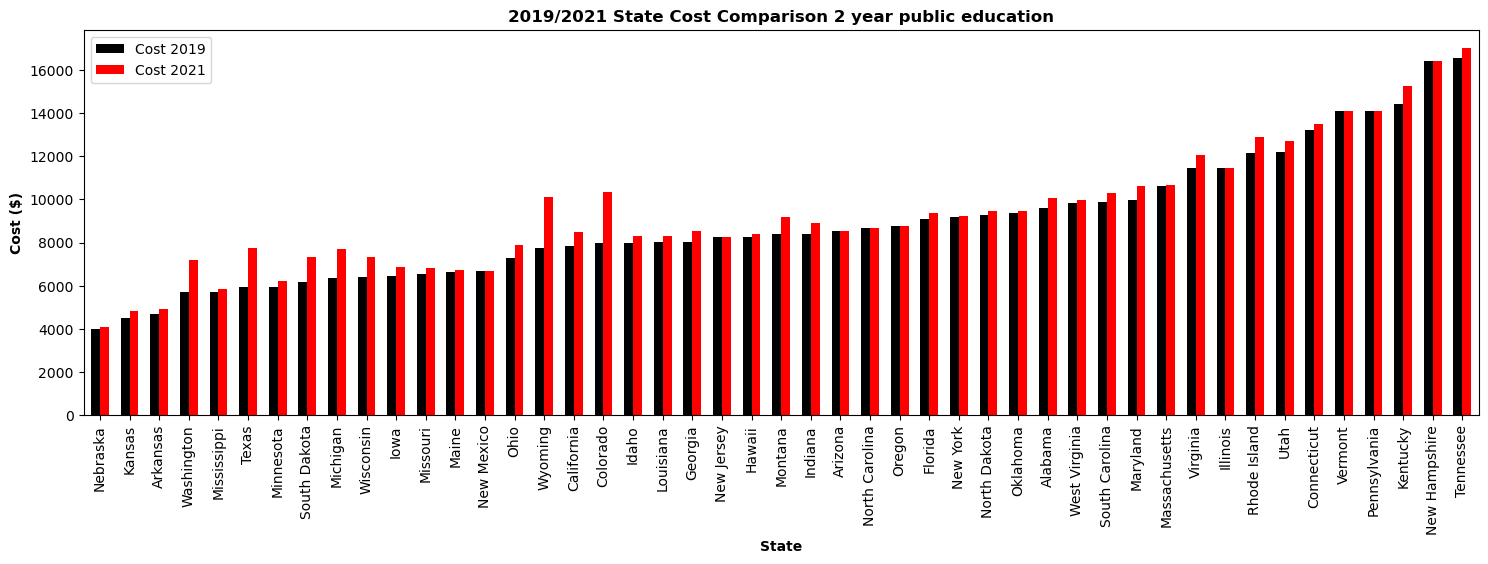

In [16]:
combined_for_plot_2year.plot.bar(figsize = (18, 5), color=["black", "red"], width = 0.6)
plt.title("2019/2021 State Cost Comparison 2 year public education", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.savefig(os.path.join("output", "two_comparison_2019_2021.png"))
plt.show()

_
### Plots to compare 2021 plot data to eachother to see differences in education cost per state
_

In [17]:
combined_for_plot = pd.merge(school_fouryear_public_2021, school_twoyear, on="State")
combined_for_plot = combined_for_plot.rename(columns={"Cost_x": "4 Year Cost", "Cost_y": "2 Year Cost"})

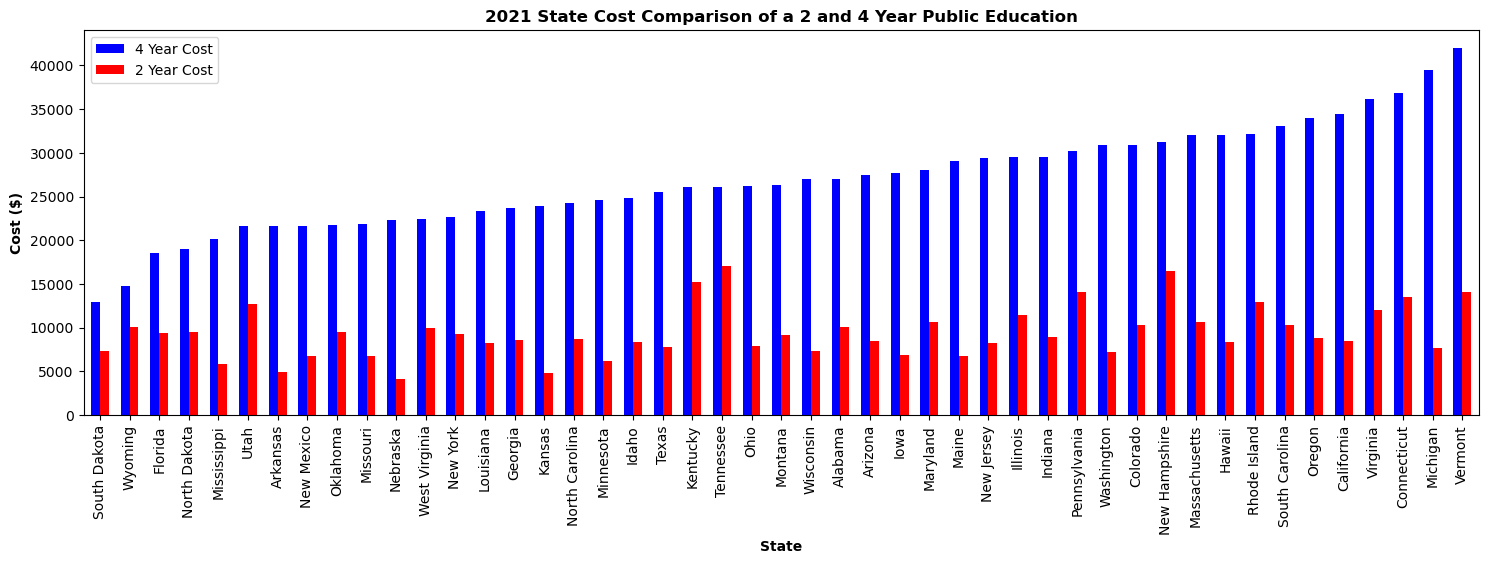

In [18]:
combined_for_plot.plot.bar(figsize = (18, 5), color=["blue", "red"], width = 0.6)
plt.title("2021 State Cost Comparison of a 2 and 4 Year Public Education", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.savefig(os.path.join("output", "two_four_comparison.png"))
plt.show()

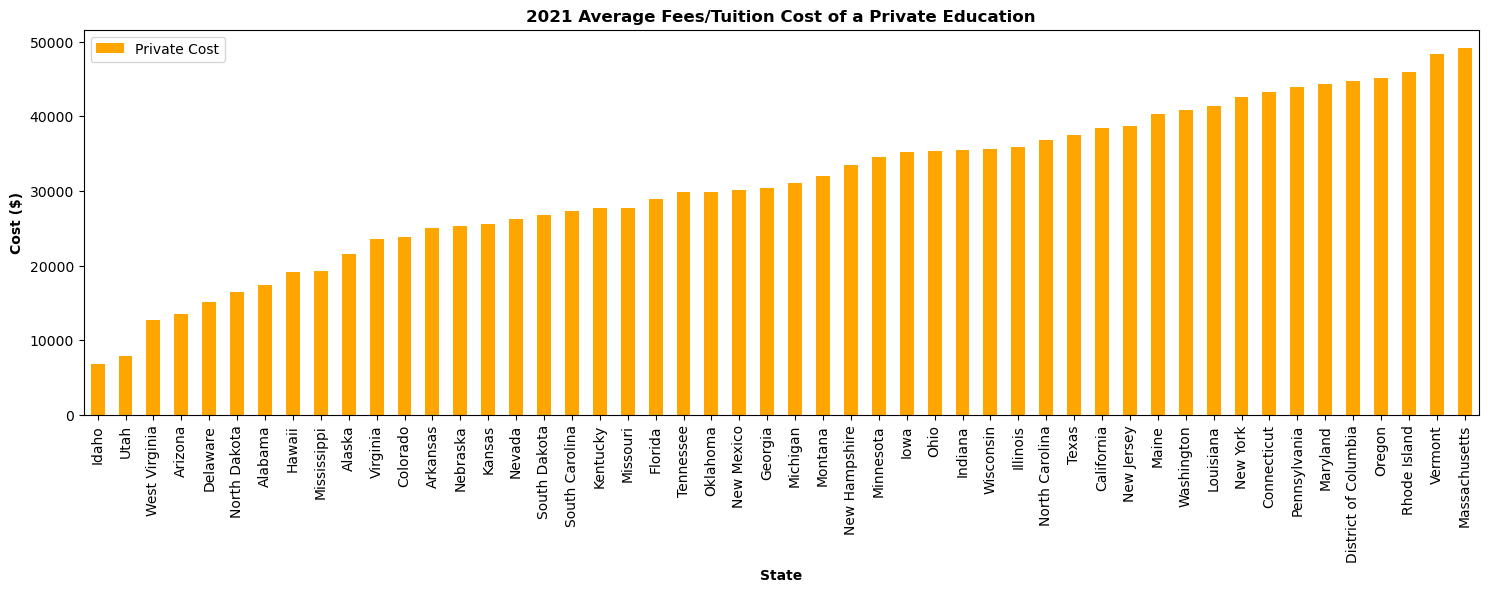

In [19]:
school_private_2021.plot.bar(figsize = (18, 5), color = "orange")
plt.legend(labels=["Private Cost"])
plt.title("2021 Average Fees/Tuition Cost of a Private Education", fontweight = "bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.savefig(os.path.join("output", "private.png"))
plt.show()

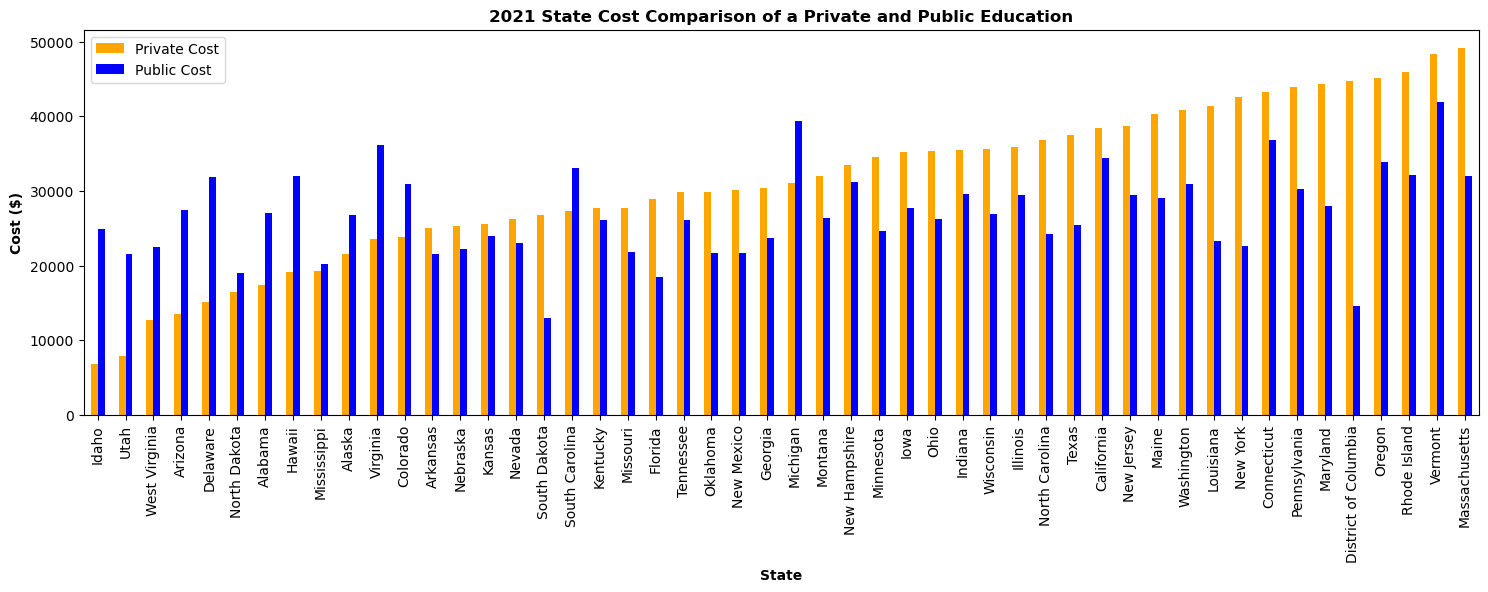

In [20]:
df_combined = pd.concat([school_private_2021, school_fouryear_public_2021], axis=1)
df_combined = df_combined.dropna()
df_combined.plot.bar(figsize = (18, 5), color = ["orange", "blue"])
plt.legend(labels=["Private Cost", "Public Cost"])
plt.title("2021 State Cost Comparison of a Private and Public Education", fontweight = "bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.savefig(os.path.join("output", "private_public_comparison.png"))
plt.show()

### Add Heatmaps showing a nice visual for where most expensive states are

In [23]:
fig = px.choropleth(school_fouryear_public_2021,
                    locations = "State Code",
                    locationmode = "USA-states",
                    scope = "usa",
                    color = "Cost",
                    color_continuous_scale = "PuBu",
                    template = "seaborn",
                    title = "2021 Map of Fees/Tuition per state (Public 4-Year)",
                    width = 800,
                    height = 600,
                    labels = {"Cost": "Cost ($)"}
    )
fig.show()

In [24]:
fig = px.choropleth(school_private_2021,
                    locations = "State Code",
                    locationmode = "USA-states",
                    scope = "usa",
                    color = "Cost",
                    color_continuous_scale = "PuBu",
                    template = "seaborn",
                    title = "2021 Map of Fees/Tuition per state (Private 4-Year)",
                    width = 800,
                    height = 600,
                    labels = {"Cost": "Cost ($)"}
    )
fig.show()